<a href="https://colab.research.google.com/github/muhammadmo/Internship/blob/main/5-Basic%20Industrial%20Quality%20Assurance%20System/5_Basic_Industrial_Quality_Assurance_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadmoosavi","key":"1fa1bc8aae4bfd517b860f44615ff8d9"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d ravirajsinh45/real-life-industrial-dataset-of-casting-product

 94% 94.0M/100M [00:04<00:00, 22.4MB/s]
100% 100M/100M [00:04<00:00, 24.1MB/s] 


In [6]:
from zipfile import ZipFile
file_name = "real-life-industrial-dataset-of-casting-product.zip"

with ZipFile(file_name,'r') as zipp:
  zipp.extractall()
print('done') 

done


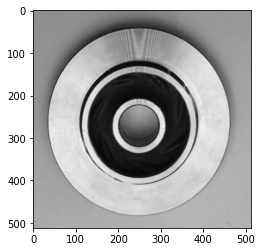

In [6]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Read image
img = cv2.imread("/content/casting_512x512/casting_512x512/ok_front/cast_ok_0_1028.jpeg")

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_range = np.array([0,0,0])
upper_range = np.array([160,160,160])

mask = cv2.inRange(hsv, lower_range, upper_range)

plt.imshow(img)

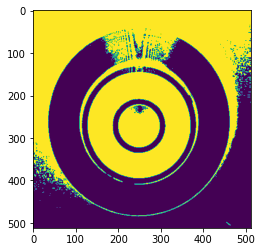

In [7]:
plt.imshow(mask)

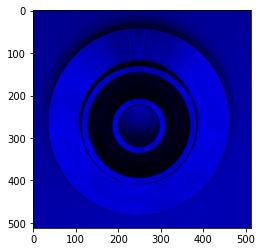

In [8]:
plt.imshow(hsv)

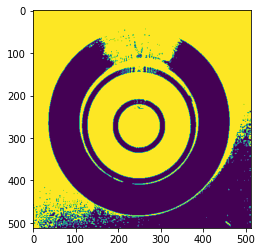

In [9]:
lower_range = np.array([0,0,0])
upper_range = np.array([0,0,170])

mask2 = cv2.inRange(hsv, lower_range, upper_range)

plt.imshow(mask2)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [8]:
def display(img):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap='gray')
    return img

In [9]:
def get_laplacian(img):    
    blurred = cv2.GaussianBlur(img, ksize=(15,15), sigmaX=0).astype('uint8')

    ret, thr = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY_INV)
    
    contours, hierarchy = cv2.findContours(thr.astype('uint8'), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    contour_list = []
    for i, contour in enumerate(contours):
        approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
        area = cv2.contourArea(contour)
        #if ((len(approx) > 8) & (area > 80) ):
        if (area > 10000):
            contour_list.append(contour)

    for i in range(len(contour_list)):
        img_contours = cv2.drawContours(img, contour_list, i, (255), -1)      

    blurred2 = cv2.GaussianBlur(img_contours, ksize=(7,7), sigmaX=0)
    
    laplacian = cv2.Laplacian(blurred2, cv2.CV_64F, ksize=7)
    laplacian = laplacian.reshape(300,300,1)
    
    return laplacian

TypeError: ignored

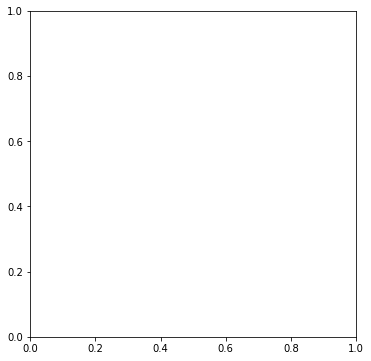

In [15]:
exemplo = cv2.imread('/content/casting_data/train/def_front/cast_def_0_1055.jpeg',0)
# display_get_laplacian(exemplo)
display(exemplo)
# get_laplacian(exemplo)

In [16]:
from keras.preprocessing.image import ImageDataGenerator

img_generator = ImageDataGenerator(rescale=1/255,
                                  validation_split=0.3,
                                  preprocessing_function=get_laplacian)

validation_generator = ImageDataGenerator(rescale=1/255,
                                         preprocessing_function=get_laplacian)

original_validation = ImageDataGenerator(rescale=1/255)

train = img_generator.flow_from_directory('/content/casting_data/casting_data/train',
                                          target_size=(300,300),
                                          color_mode='grayscale',
                                          class_mode='binary',
                                          subset='training')

test = img_generator.flow_from_directory('/content/casting_data/casting_data/train',
                                          target_size=(300,300),
                                          color_mode='grayscale',
                                          class_mode='binary',
                                          subset='validation')

validation = validation_generator.flow_from_directory('/content/casting_data/casting_data/test',
                                               target_size=(300,300),
                                               color_mode='grayscale',
                                               shuffle=False,
                                               class_mode='binary',
                                               batch_size=1)

original_images = original_validation.flow_from_directory('/content/casting_data/casting_data/test',
                                               target_size=(300,300),
                                               color_mode='grayscale',
                                               shuffle=False,
                                               class_mode='binary',
                                               batch_size=1)

Found 4644 images belonging to 2 classes.
Found 1989 images belonging to 2 classes.
Found 715 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [17]:
train.class_indices

{'def_front': 0, 'ok_front': 1}

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

model.add(Conv2D(filters=28, kernel_size=3, activation='relu', input_shape=(300,300,1)))
model.add(Conv2D(filters=28, kernel_size=3, activation='relu', input_shape=(300,300,1)))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=28, kernel_size=3, activation='relu', input_shape=(300,300,1)))
model.add(Conv2D(filters=28, kernel_size=3, activation='relu', input_shape=(300,300,1)))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=28, kernel_size=3, activation='relu', input_shape=(300,300,1)))
model.add(Conv2D(filters=28, kernel_size=3, activation='relu', input_shape=(300,300,1)))
model.add(MaxPool2D(pool_size=2))

model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 28)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 296, 296, 28)      7084      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 28)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 146, 146, 28)      7084      
                                                                 
 conv2d_3 (Conv2D)           (None, 144, 144, 28)      7084      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 72, 72, 28)       0         
 2D)                                                    

In [20]:
history = model.fit(train,epochs=10,steps_per_epoch=len(train),validation_data=test,validation_steps=len(test))

Epoch 1/10
146/146 [==============================] - 66s 365ms/step - loss: 0.4999 - accuracy: 0.7584 - val_loss: 0.2503 - val_accuracy: 0.8989
Epoch 2/10
146/146 [==============================] - 52s 355ms/step - loss: 0.1835 - accuracy: 0.9244 - val_loss: 0.0856 - val_accuracy: 0.9693
Epoch 3/10
146/146 [==============================] - 52s 355ms/step - loss: 0.0712 - accuracy: 0.9763 - val_loss: 0.0656 - val_accuracy: 0.9764
Epoch 4/10
146/146 [==============================] - 52s 356ms/step - loss: 0.0626 - accuracy: 0.9811 - val_loss: 0.0611 - val_accuracy: 0.9779
Epoch 5/10
146/146 [==============================] - 52s 355ms/step - loss: 0.0315 - accuracy: 0.9888 - val_loss: 0.0819 - val_accuracy: 0.9729
Epoch 6/10
146/146 [==============================] - 52s 355ms/step - loss: 0.0146 - accuracy: 0.9961 - val_loss: 0.0330 - val_accuracy: 0.9910
Epoch 7/10
146/146 [==============================] - 52s 355ms/step - loss: 0.0611 - accuracy: 0.9804 - val_loss: 0.1862 - val_ac

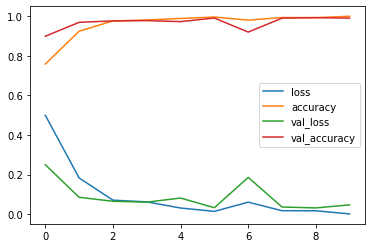

In [22]:
pd.DataFrame(model.history.history).plot()

In [23]:
test_accu = model.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')
preds = model.predict(test,verbose=1)

63/63 [==============================] - 11s 169ms/step - loss: 0.0475 - accuracy: 0.9904
The testing accuracy is : 99.0447461605072 %
63/63 [==============================] - 14s 210ms/step
